## Monte Carlo Integration

To take advantage of the fact that our integrand is not an ordinary function but a density, an integration through a proposed stochastic simulation is the **Monte Carlo (MC) Integral**. The idea comes from the Law of Large Number since we know that

$$\frac{1}{n}\sum_{i=1}^n X_i\approx\mathbb{E}(X)=\int x f(x)\mathrm{d}x $$

Thus given a sample $\theta_1,\dots\theta_n$ from $p(\theta|x)$ we expect that 

$$\widehat{I} = \frac{1}{n}\sum_{i=1}^n g(\theta_i)\approx\mathbb{E}(g(\Theta|X=x))=\int g(\theta) p(\theta|x)\mathrm{d}\theta $$

$\widehat{I}(x)$ is sometimes called the MC estimator and enjoying several "frequentist" properties under mild conditions:
* Unbiasedness: $\mathbb{E} \widehat{I}(x) = I(x)$;
* Variance: $\Omega\equiv\mathbb{V}\widehat{I}(x)= (\mathbb{E}g(\Theta)^2 - I^2)/n$;
* Strong Consistency: $\widehat{I}(x) \overset{a.s.}{\rightarrow}  I(x)$;
* Asymptotically Normality: $\sqrt{n}(\widehat{I}(x) - I)\overset{d}{\rightarrow} N(0,\Omega)$

Hence the MC error in of order $O(n^{-1/2})$ and, unlike the frequentist world, $n$ is controlled by the experimenter so you can increase $n$ arbitrary to have a virtually a error-free estimation.

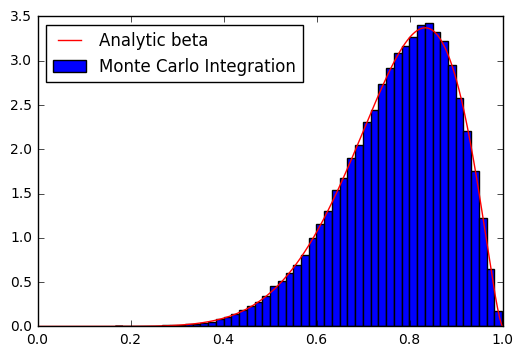

In [1]:
# Monte Carlo integration of beta function
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

s =100000
n = 10
x = 8
a = x+1/2
b = n-x+1/2

sample = np.random.beta(a,b,s)

# Plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
# Plot MC sample
ax.hist(sample, bins=50, normed=True);
# Plot analytic beta
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a, b).pdf(X), 'r');

# Cleanup
ax.legend(['Analytic beta','Monte Carlo Integration'],loc='best');

fig

In [2]:
# Monte Carlo point estimates

estimates=pd.DataFrame(index=['mean','median','mode','variance'])

estimates['sample']=[np.mean(sample),
                     np.median(sample),
                     max(sample),
                     np.var(sample)]

estimates['true']=[a/(a+b), # beta mean 
                   (a-1/3)/(a+b-2/3), # beta median
                   (a-1)/(a+b-2), # beta mode
                   a*b/((a+b)**2*(a+b+1)) # beta variance
                  ]

print(estimates)

            sample      true
mean      0.772234  0.772727
median    0.789136  0.790323
mode      0.998782  0.833333
variance  0.014644  0.014635
